In [ ]:
#-------------------------------------# # Library importations # #-------------------------------------#

In [58]:
import os
import tweepy as tw
import pandas as pd
import itertools
import collections
from datetime import datetime

In [59]:
import pandas as pd
import numpy as np

# JSON is short for JavaScript Object Notation, and is a way to store information in an
# organized, easy-to-access manner.
import json 
# The re module provides regular expression matching operations. 
import re

# NLTK is a leading platform for building Python programs to work with natural language data. 
from nltk.corpus import stopwords
from nltk.tokenize import WordPunctTokenizer
from nltk.stem.wordnet import WordNetLemmatizer 

# tweepy is a library for accessing the Twitter API.
import tweepy
from tweepy import OAuthHandler
from tweepy.streaming import StreamListener

# wordcloud is a library for generating wordcloud figures.
from wordcloud import WordCloud 
import string
import pickle

# The time function is used to set the time limit of "listening" the tweets.
import time

In [60]:
import nltk
nltk.download('stopwords') # NOTE: ONCE YOU HAVE DOWNLOAD THESE CORPORA, YOU CAN COMMENT OUT THIS LINE.
nltk.download('wordnet') # NOTE: ONCE YOU HAVE DOWNLOAD THESE CORPORA, YOU CAN COMMENT OUT  THIS LINE.

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/tan6tur/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /home/tan6tur/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
################################### SECTION 3: PREPARE THE DATA  ###########################################

In [61]:

# merging the data files and changing the format to CSV

tweetList = []

files=["July.json","august.json","September.json","October.json","November.json","December.json","January.json","February.json","March.json","April.json"]
for i in range (0,10):
    with open(files[i]) as in_file:  # change the name of your json file.
        for line in in_file:
            if line.strip():
                tweets = json.loads(line)
                data = tweets['data']
                print(data[0].keys())
                for tweet in data:
                    keys = tweet.keys()

                    mentions = list(map(lambda x: x['username'],tweet['entities']['mentions']))
                    row = (
                    tweet['author_id'],                      # author id  
                    tweet['created_at'],                     # created at
                    tweet['public_metrics']['retweet_count'],# retweets
                    tweet['public_metrics']['reply_count'],  #replies
                    tweet['public_metrics']['like_count'],   #likes
                    tweet['public_metrics']['quote_count'],  #quotes
                    str(mentions).strip('[]'),               #mentions
                    tweet['id'],                             #id
                    tweet['text'],                           #text
                    tweet['lang'],                           #language
                    tweet['source'],                         #source
                    tweet['reply_settings']                  #reply settings
                    )       
                    values = [value for value in row]
                    tweetList.append(values)
        
colNames = 'author_id,created_at,retweets_nr,reply_nr,like_nr,quote_nr,mentions_usernames,id,text,language,source,reply_settings'.split(',')

# If the account does not share location information, we replace it as NaN.
tweetsDf = pd.DataFrame(tweetList,columns=colNames) 
    

dict_keys(['entities', 'lang', 'created_at', 'text', 'in_reply_to_user_id', 'public_metrics', 'id', 'author_id', 'reply_settings', 'source'])
dict_keys(['id', 'lang', 'created_at', 'text', 'public_metrics', 'entities', 'author_id', 'reply_settings', 'source'])
dict_keys(['reply_settings', 'id', 'created_at', 'text', 'in_reply_to_user_id', 'public_metrics', 'lang', 'author_id', 'entities', 'source'])
dict_keys(['lang', 'id', 'created_at', 'text', 'in_reply_to_user_id', 'public_metrics', 'entities', 'author_id', 'reply_settings', 'source'])
dict_keys(['lang', 'id', 'created_at', 'text', 'in_reply_to_user_id', 'public_metrics', 'entities', 'author_id', 'reply_settings', 'source'])
dict_keys(['lang', 'id', 'created_at', 'text', 'in_reply_to_user_id', 'public_metrics', 'entities', 'author_id', 'reply_settings', 'source'])
dict_keys(['lang', 'reply_settings', 'id', 'created_at', 'text', 'in_reply_to_user_id', 'public_metrics', 'entities', 'author_id', 'source'])
dict_keys(['lang', 'id', 'cre

In [62]:
tweetsDf.head()

,author_id,created_at,retweets_nr,reply_nr,like_nr,quote_nr,mentions_usernames,id,text,language,source,reply_settings
0,20123238,2020-07-27T13:50:12.000Z,0,0,0,0,"'BottleRockNapa', 'JaMCellars', 'ElleKingMusic'",1287747118891843587,@BottleRockNapa @JaMCellars @ElleKingMusic Why...,en,Twitter for Android,everyone
1,2358609954,2020-07-25T21:07:09.000Z,0,0,1,0,"'BottleRockNapa', 'JaMCellars', 'ElleKingMusic'",1287132303257477120,@BottleRockNapa @JaMCellars @ElleKingMusic I w...,en,Twitter for iPhone,everyone
2,59311659,2020-07-25T19:30:00.000Z,0,0,1,0,"'wearetwinxl', 'BottleRockNapa', 'CameronWalker'",1287107853761875970,INTERVIEW: Twin XL (@wearetwinxl) rides 'Good'...,en,TweetDeck,everyone
3,1044741391803404289,2020-07-25T17:56:38.000Z,0,0,0,0,"'BottleRockNapa', 'ChiliPeppers'",1287084356385767426,@BottleRockNapa @ChiliPeppers Talento BRASILEI...,pt,Twitter for Android,everyone
4,17606101,2020-07-25T05:30:49.000Z,0,0,1,0,"'BottleRockNapa', 'NRateliff', 'SantanaCarlos'",1286896667921276929,@BottleRockNapa @NRateliff @SantanaCarlos Love...,en,Twitter for Android,everyone


In [63]:
tweetsDf.tail()

,author_id,created_at,retweets_nr,reply_nr,like_nr,quote_nr,mentions_usernames,id,text,language,source,reply_settings
520,1017390478797492224,2021-04-02T11:33:15.000Z,0,0,0,0,"'BottleRockNapa', 'JaMCellars'",1377947229072338945,Getaway with your bestie for a #ButterDay at @...,en,Twitter Web App,everyone
521,1017390478797492224,2021-04-02T11:24:15.000Z,0,0,0,0,"'BottleRockNapa', 'JaMCellars'",1377944965280641024,Getaway with your bestie for a #ButterDay at @...,en,Twitter Web App,everyone
522,248270245,2021-04-01T18:06:37.000Z,0,0,0,0,"'BottleRockNapa', 'JaMCellars'",1377683834959978496,Getaway with your bestie for a #ButterDay at @...,en,Twitter Web App,everyone
523,2207997745,2021-04-01T16:23:05.000Z,0,0,0,0,"'BottleRockNapa', 'JaMCellars'",1377657781541597191,Getaway with your bestie for a #ButterDay at @...,en,Twitter Web App,everyone
524,2178317042,2021-04-01T13:33:56.000Z,0,0,0,0,"'NeilYoungNYA', 'BottleRockNapa'",1377615213583798282,@NeilYoungNYA @BottleRockNapa I'm flying out i...,en,Twitter for Android,everyone


In [64]:
index = tweetsDf.index
len(index)

525

In [ ]:
#3.1.1. Addind derived attributes in Python

In [65]:
#create a datetime object
tweetsDf['created_at'] = tweetsDf['created_at'].apply(lambda x: datetime.strptime(x,'%Y-%m-%dT%H:%M:%S.000Z'))

In [66]:
tweetsDf.head()

,author_id,created_at,retweets_nr,reply_nr,like_nr,quote_nr,mentions_usernames,id,text,language,source,reply_settings
0,20123238,2020-07-27 13:50:12,0,0,0,0,"'BottleRockNapa', 'JaMCellars', 'ElleKingMusic'",1287747118891843587,@BottleRockNapa @JaMCellars @ElleKingMusic Why...,en,Twitter for Android,everyone
1,2358609954,2020-07-25 21:07:09,0,0,1,0,"'BottleRockNapa', 'JaMCellars', 'ElleKingMusic'",1287132303257477120,@BottleRockNapa @JaMCellars @ElleKingMusic I w...,en,Twitter for iPhone,everyone
2,59311659,2020-07-25 19:30:00,0,0,1,0,"'wearetwinxl', 'BottleRockNapa', 'CameronWalker'",1287107853761875970,INTERVIEW: Twin XL (@wearetwinxl) rides 'Good'...,en,TweetDeck,everyone
3,1044741391803404289,2020-07-25 17:56:38,0,0,0,0,"'BottleRockNapa', 'ChiliPeppers'",1287084356385767426,@BottleRockNapa @ChiliPeppers Talento BRASILEI...,pt,Twitter for Android,everyone
4,17606101,2020-07-25 05:30:49,0,0,1,0,"'BottleRockNapa', 'NRateliff', 'SantanaCarlos'",1286896667921276929,@BottleRockNapa @NRateliff @SantanaCarlos Love...,en,Twitter for Android,everyone


In [67]:
#add date derived attribures
tweetsDf['hour'] = tweetsDf['created_at'].apply(lambda x: x.hour)
tweetsDf['month'] = tweetsDf['created_at'].apply(lambda x: x.month)
tweetsDf['day'] = tweetsDf['created_at'].apply(lambda x: x.day)
tweetsDf['year'] = tweetsDf['created_at'].apply(lambda x: x.year)

In [68]:
tweetsDf.head()

,author_id,created_at,retweets_nr,reply_nr,like_nr,quote_nr,mentions_usernames,id,text,language,source,reply_settings,hour,month,day,year
0,20123238,2020-07-27 13:50:12,0,0,0,0,"'BottleRockNapa', 'JaMCellars', 'ElleKingMusic'",1287747118891843587,@BottleRockNapa @JaMCellars @ElleKingMusic Why...,en,Twitter for Android,everyone,13,7,27,2020
1,2358609954,2020-07-25 21:07:09,0,0,1,0,"'BottleRockNapa', 'JaMCellars', 'ElleKingMusic'",1287132303257477120,@BottleRockNapa @JaMCellars @ElleKingMusic I w...,en,Twitter for iPhone,everyone,21,7,25,2020
2,59311659,2020-07-25 19:30:00,0,0,1,0,"'wearetwinxl', 'BottleRockNapa', 'CameronWalker'",1287107853761875970,INTERVIEW: Twin XL (@wearetwinxl) rides 'Good'...,en,TweetDeck,everyone,19,7,25,2020
3,1044741391803404289,2020-07-25 17:56:38,0,0,0,0,"'BottleRockNapa', 'ChiliPeppers'",1287084356385767426,@BottleRockNapa @ChiliPeppers Talento BRASILEI...,pt,Twitter for Android,everyone,17,7,25,2020
4,17606101,2020-07-25 05:30:49,0,0,1,0,"'BottleRockNapa', 'NRateliff', 'SantanaCarlos'",1286896667921276929,@BottleRockNapa @NRateliff @SantanaCarlos Love...,en,Twitter for Android,everyone,5,7,25,2020


In [69]:
# This function is based on a function provided by
# https://github.com/AndreyKarasev/Data_Science_Class
def cleanLem (text, keyWord):
    '''Function
    --------
    Return a tweet after removing stop words, urls, RTs, the keyword, 
    and characters that are not letters.
    Also lemmitizes words in tweets

    Parameters
    ----------
    text : str
        Original tweet
    keyWord : str
        The keyword you want to exclude in the wordcloud

    Returns
    -------
    clean tweet : str'''
    #  Tokenize a text into a sequence of alphabetic and non-alphabetic characters
    tokenizer = WordPunctTokenizer()
    
    # Lemmatize a word
    lemmatizer = WordNetLemmatizer() 
    
    # Remove stopwords
    stopWords = stopwords.words('english')
    
    # Remove words in customised list
    customList = ['amp'] 
    exclude = stopWords + customList + keyWord.split()
    
    # Remove strings that match the pattern of '\s*RT\s\S*\s'
    # \s*: any number whitespace characters (include 0 whitespace)
    # RT: RT
    # \s: one whitespace
    # \S*: any non-whitespace characters (include punctuation)
    text = re.sub(r'\s*RT\s\S*\s', '', text)  # delete any number of RTs
    text = re.sub(r'http\S*', '', text)  # remove url
    
    # tokenizer will seperate alphabetic and non-alphabetic characters.
    # Need to covert to lowercase characters, or later the algorithm will treat lowercase 
    # and uppercase characters as different characters when we generate wordclouds.
    words = tokenizer.tokenize(text.lower()) 
    cleanWords = [word for word in words if word not in exclude]
    lemWords = []
    for word in cleanWords:    
        # keeps only alphabetic characters
        letters=''.join([letter for letter in word if letter.isalpha()])
        lemWords.append(lemmatizer.lemmatize(letters))
        continue  
    return  ' '.join(lemWords)

In [70]:
keyWord = 'bottlerocknapa'
tweetsDf['textCleanLem'] = tweetsDf.text.apply(cleanLem, keyWord = 'bottlerocknapa')

In [71]:
tweetsDf.head()

,author_id,created_at,retweets_nr,reply_nr,like_nr,quote_nr,mentions_usernames,id,text,language,source,reply_settings,hour,month,day,year,textCleanLem
0,20123238,2020-07-27 13:50:12,0,0,0,0,"'BottleRockNapa', 'JaMCellars', 'ElleKingMusic'",1287747118891843587,@BottleRockNapa @JaMCellars @ElleKingMusic Why...,en,Twitter for Android,everyone,13,7,27,2020,jamcellars ellekingmusic cut santana song ...
1,2358609954,2020-07-25 21:07:09,0,0,1,0,"'BottleRockNapa', 'JaMCellars', 'ElleKingMusic'",1287132303257477120,@BottleRockNapa @JaMCellars @ElleKingMusic I w...,en,Twitter for iPhone,everyone,21,7,25,2020,jamcellars ellekingmusic set peppered heavy...
2,59311659,2020-07-25 19:30:00,0,0,1,0,"'wearetwinxl', 'BottleRockNapa', 'CameronWalker'",1287107853761875970,INTERVIEW: Twin XL (@wearetwinxl) rides 'Good'...,en,TweetDeck,everyone,19,7,25,2020,interview twin xl wearetwinxl ride good v...
3,1044741391803404289,2020-07-25 17:56:38,0,0,0,0,"'BottleRockNapa', 'ChiliPeppers'",1287084356385767426,@BottleRockNapa @ChiliPeppers Talento BRASILEI...,pt,Twitter for Android,everyone,17,7,25,2020,chilipeppers talento brasileiro
4,17606101,2020-07-25 05:30:49,0,0,1,0,"'BottleRockNapa', 'NRateliff', 'SantanaCarlos'",1286896667921276929,@BottleRockNapa @NRateliff @SantanaCarlos Love...,en,Twitter for Android,everyone,5,7,25,2020,nrateliff santanacarlos loved


In [72]:
#nr of nas
tweetsDf.isnull().sum()

author_id             0
created_at            0
retweets_nr           0
reply_nr              0
like_nr               0
quote_nr              0
mentions_usernames    0
id                    0
text                  0
language              0
source                0
reply_settings        0
hour                  0
month                 0
day                   0
year                  0
textCleanLem          0
dtype: int64

In [73]:
#creating a derived target attribute
tweetsDf["Score"]=tweetsDf["retweets_nr"]+tweetsDf["reply_nr"]+tweetsDf["like_nr"]+tweetsDf['quote_nr']

In [74]:
tweetsDf.head()

,author_id,created_at,retweets_nr,reply_nr,like_nr,quote_nr,mentions_usernames,id,text,language,source,reply_settings,hour,month,day,year,textCleanLem,Score
0,20123238,2020-07-27 13:50:12,0,0,0,0,"'BottleRockNapa', 'JaMCellars', 'ElleKingMusic'",1287747118891843587,@BottleRockNapa @JaMCellars @ElleKingMusic Why...,en,Twitter for Android,everyone,13,7,27,2020,jamcellars ellekingmusic cut santana song ...,0
1,2358609954,2020-07-25 21:07:09,0,0,1,0,"'BottleRockNapa', 'JaMCellars', 'ElleKingMusic'",1287132303257477120,@BottleRockNapa @JaMCellars @ElleKingMusic I w...,en,Twitter for iPhone,everyone,21,7,25,2020,jamcellars ellekingmusic set peppered heavy...,1
2,59311659,2020-07-25 19:30:00,0,0,1,0,"'wearetwinxl', 'BottleRockNapa', 'CameronWalker'",1287107853761875970,INTERVIEW: Twin XL (@wearetwinxl) rides 'Good'...,en,TweetDeck,everyone,19,7,25,2020,interview twin xl wearetwinxl ride good v...,1
3,1044741391803404289,2020-07-25 17:56:38,0,0,0,0,"'BottleRockNapa', 'ChiliPeppers'",1287084356385767426,@BottleRockNapa @ChiliPeppers Talento BRASILEI...,pt,Twitter for Android,everyone,17,7,25,2020,chilipeppers talento brasileiro,0
4,17606101,2020-07-25 05:30:49,0,0,1,0,"'BottleRockNapa', 'NRateliff', 'SantanaCarlos'",1286896667921276929,@BottleRockNapa @NRateliff @SantanaCarlos Love...,en,Twitter for Android,everyone,5,7,25,2020,nrateliff santanacarlos loved,1


In [75]:
# Save the preprocessed tweets into a CSV file
tweetsDf.to_csv('tweetsFestival.csv')

In [ ]:
################################### SECTION 2: UNDERSTAND THE DATA  ###########################################
#2.2.1. Text data

In [76]:
# Generate the wordcloud
corpus = ' '.join(tweetsDf.textCleanLem.tolist())
def cloud():
    wordcloud = WordCloud(background_color='black',height=400,width=600,stopwords=(keyWord)).generate(corpus)
    pylab.figure(figsize=(18,7))
    pylab.axis("off") 
    pylab.imshow(wordcloud)

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


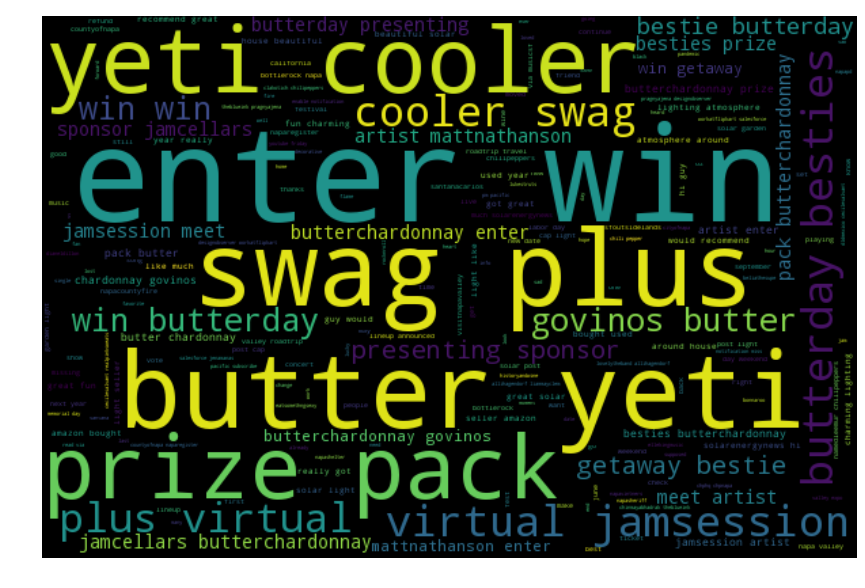

In [77]:
# Plot the wordcloud
%pylab inline
cloud()
fig.savefig('words_clean.png')

In [78]:
# Generate the wordcloud
corpus = ' '.join(tweetsDf.text.tolist())
def cloud():
    wordcloud = WordCloud(background_color='black',height=400,width=600,stopwords=(keyWord)).generate(corpus)
    pylab.figure(figsize=(18,7))
    pylab.axis("off") 
    pylab.imshow(wordcloud)

Populating the interactive namespace from numpy and matplotlib


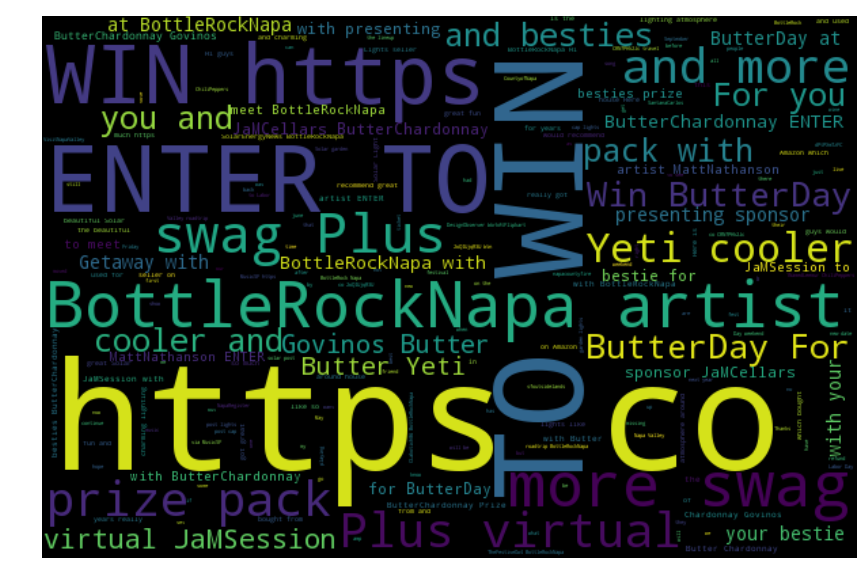

In [45]:
# Plot the wordcloud
%pylab inline
cloud()
fig.savefig('words.png')

In [79]:
# Create a list of lists containing lowercase words for each tweet
words_in_tweet = [tweet.lower().split() for tweet in tweetsDf["textCleanLem"]]
words_in_tweet[2]

['interview',
 'twin',
 'xl',
 'wearetwinxl',
 'ride',
 'good',
 'vibe',
 'way',
 'new',
 'act',
 'career',
 'musician',
 'play',
 'next',
 'may',
 'cameronwalker']

In [81]:
all_words = list(itertools.chain(*words_in_tweet))
all_words[2]

'cut'

In [83]:
# Count each word across all tweets 
counts = collections.Counter(all_words)
counts.most_common(15)

[('win', 475),
 ('butterchardonnay', 298),
 ('butterday', 298),
 ('enter', 298),
 ('butter', 229),
 ('artist', 178),
 ('cooler', 175),
 ('prize', 175),
 ('swag', 175),
 ('pack', 175),
 ('besties', 175),
 ('plus', 175),
 ('virtual', 175),
 ('jamsession', 175),
 ('yeti', 175)]

In [84]:
# Process for word counts


clean_tweets_nsw = pd.DataFrame(counts.most_common(15),
                             columns=['words', 'count'])
clean_tweets_nsw

,words,count
0,win,475
1,butterchardonnay,298
2,butterday,298
3,enter,298
4,butter,229
5,artist,178
6,cooler,175
7,prize,175
8,swag,175
9,pack,175


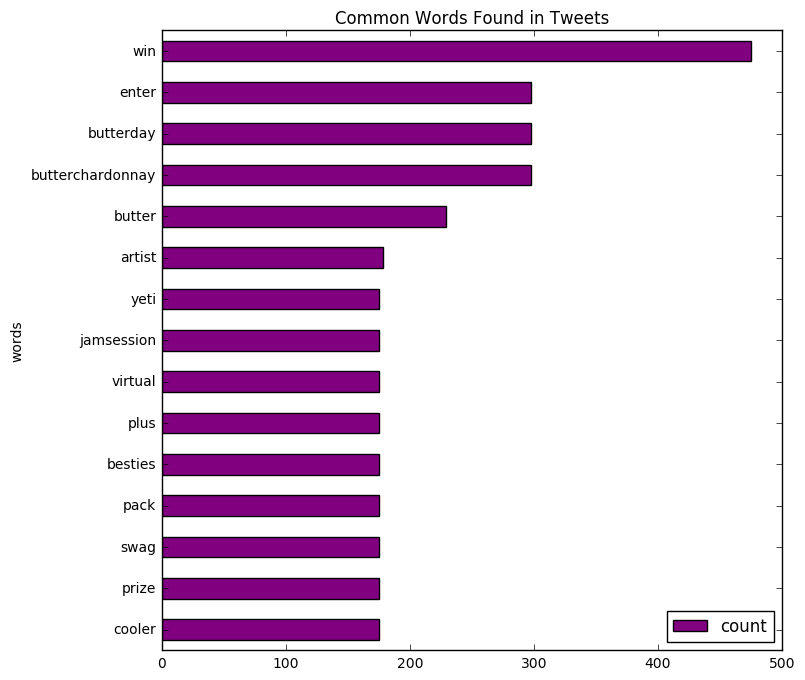

In [88]:
fig, ax = plt.subplots(figsize=(8, 8))

# Plot horizontal bar graph
clean_tweets_nsw.sort_values(by='count').plot.barh(x='words',
                      y='count',
                      ax=ax,
                      color="purple")

ax.set_title("Common Words Found in Tweets")

plt.show()
fig.savefig('words_clean_count.png')